## **Oficina de Ajuste de Dados do PET Física**

In [1]:
import matplotlib.pyplot as plt      # pra fazer os gráficos
import numpy as np                   # traz algumas funções matemáticas
from scipy.optimize import curve_fit # pra fazer o ajuste de curvas

### Plotagem de gráficos e barras de erro:

In [2]:
x = np.arange(1, 21, 1) # cria um vetor com várias variáveis x
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [3]:
y = np.random.uniform(1, 5, len(x)) # cria variáveis aleatórias entre 1 e 5, uma para cada valor de x
y = np.sort(y)                      # coloca os valores em ordem crescente
y

array([1.05039933, 1.29316862, 1.32139934, 1.58946173, 1.5917194 ,
       1.63192813, 2.64506956, 2.78450142, 2.88256764, 2.97225257,
       3.15054747, 3.26499729, 3.34937084, 3.51283686, 3.57825213,
       3.64425618, 4.20361232, 4.31628145, 4.9473122 , 4.99828225])

In [4]:
ye = 0.1*y # aqui criamos o erro associado a y
ye

array([0.10503993, 0.12931686, 0.13213993, 0.15894617, 0.15917194,
       0.16319281, 0.26450696, 0.27845014, 0.28825676, 0.29722526,
       0.31505475, 0.32649973, 0.33493708, 0.35128369, 0.35782521,
       0.36442562, 0.42036123, 0.43162815, 0.49473122, 0.49982823])

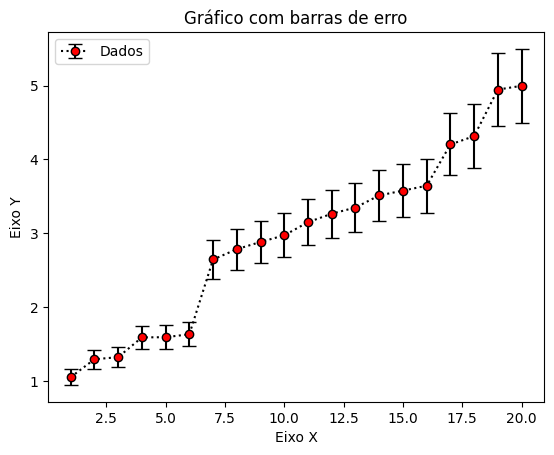

In [5]:
# gráfico de pontos com barra de erro vertical:
plt.errorbar(x, y, yerr=ye, linestyle='dotted', fmt='o', mfc='r', label='Dados', capsize=5, color='black')
plt.legend()
plt.title('Gráfico com barras de erro')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

### Ajuste com a função *curvefit*:

In [30]:
x = np.arange(1, 20, 0.4) # mais uma vez, valores de x
x

array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ,
        5.4,  5.8,  6.2,  6.6,  7. ,  7.4,  7.8,  8.2,  8.6,  9. ,  9.4,
        9.8, 10.2, 10.6, 11. , 11.4, 11.8, 12.2, 12.6, 13. , 13.4, 13.8,
       14.2, 14.6, 15. , 15.4, 15.8, 16.2, 16.6, 17. , 17.4, 17.8, 18.2,
       18.6, 19. , 19.4, 19.8])

In [31]:
def f(x):       # define a função que nos dará os dados
  return 2*x + 1

dados = f(x) + np.random.normal(.0, 1.2, len(x)) # dados = função + ruido aleatório
dados

array([ 3.89614676,  4.31870884,  3.29657315,  5.34644524,  8.11699129,
        5.5711361 ,  6.22330697,  9.29405501,  9.51725216, 11.70633168,
       10.20717538, 10.67321301, 14.71861034, 11.64525206, 14.59135898,
       14.75359024, 17.27972329, 16.50374763, 15.74842603, 20.20575201,
       20.07658266, 18.19465209, 19.00315479, 21.95404623, 22.02992309,
       20.63612033, 23.35065927, 24.81442142, 26.8450298 , 25.12478322,
       26.50345461, 29.15946334, 27.04734925, 29.53657252, 29.59940609,
       28.71762579, 33.35705757, 29.77175877, 33.41597092, 30.28646558,
       34.17293937, 35.28455827, 35.85461231, 35.99867831, 39.09064985,
       40.42413348, 39.18436657, 39.58441315])

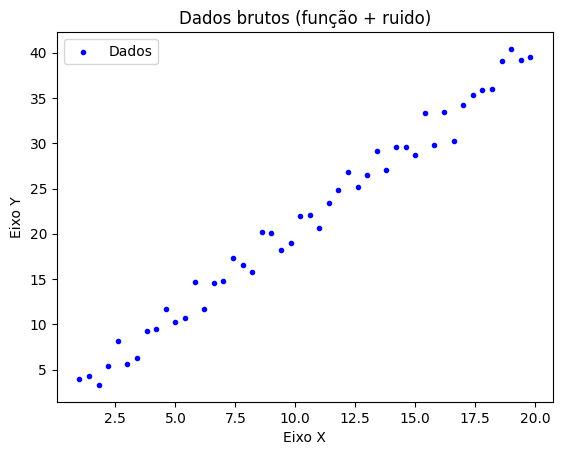

In [32]:
# gráfico de pontos dos dados que criamos
plt.scatter(x, dados, color='b', marker='.', label='Dados')
plt.legend()
plt.title('Dados brutos (função + ruido)')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

In [33]:
# agora sim, o ajuste:
def g(x, a, b):             # define a função que vamos ajustar
  return a*x + b

popt, pcov = curve_fit(g, x, dados, p0=[1,0])  # realiza o ajuste dos parâmetros a e b
popt                                           # popt = parâmetros optimizados, pcov = matriz covariância

array([1.94963905, 1.23693394])

In [34]:
pcov  # nos dá a incerteza no ajuste

array([[ 0.00123775, -0.01287255],
       [-0.01287255,  0.17188155]])

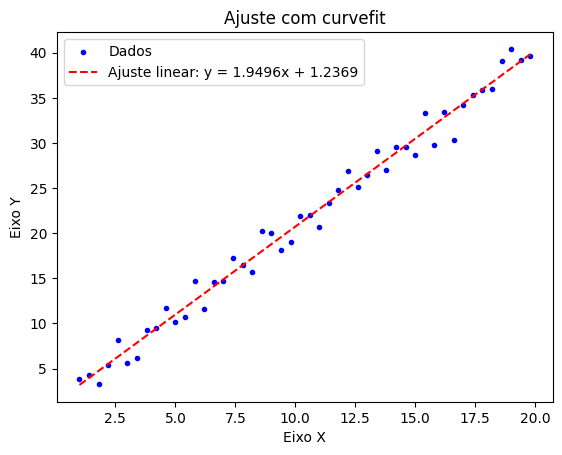

In [35]:
# gráfico de pontos dos dados que criamos
plt.scatter(x, dados, color='b', marker='.', label='Dados')
plt.plot(x, g(x, *popt), 'r--', label= f'Ajuste linear: y = {popt[0]:.4f}x + {popt[1]:.4f}')
plt.legend()
plt.title('Ajuste com curvefit')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

### Ajuste não-linear:

In [39]:
x = np.arange(1, 20, 0.4)
x

def f(x):       # agora uma função mais legal
  return 0.43*x**2 + 1.32*x + 0.5

dados = f(x) + np.random.normal(.0, 1.2, len(x))
dados

array([  3.21467448,   4.04245773,   2.90136377,   3.36976496,
         6.63619451,   8.21423111,  11.75320502,  10.72580111,
        12.32807017,  14.83719033,  17.01603974,  19.23550735,
        22.84827127,  24.03342776,  28.44980513,  29.42724439,
        34.3618081 ,  37.88056957,  40.04052028,  43.92862323,
        46.80804595,  51.81789055,  54.18694472,  59.72747555,
        65.64368675,  68.33255608,  72.04250735,  78.02803168,
        79.4529792 ,  84.52923682,  88.26006532,  95.97476815,
        99.29260972, 105.72069929, 111.92884701, 116.57700963,
       122.66831357, 128.14595475, 134.65619274, 141.62861129,
       147.50934192, 151.71214519, 157.29860711, 166.14907464,
       171.71854723, 180.41408743, 186.30013654, 197.04846933])

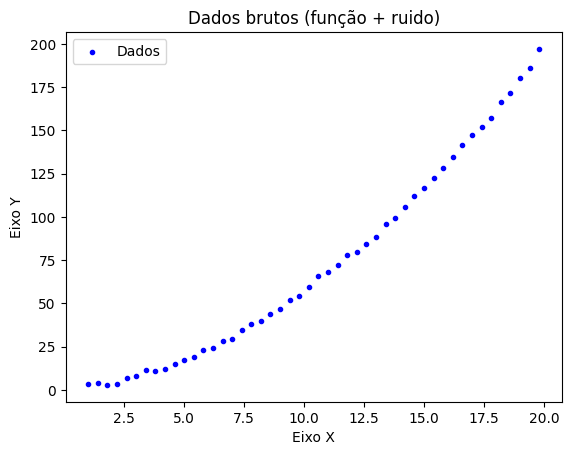

In [40]:
plt.scatter(x, dados, color='b', marker='.', label='Dados')
plt.legend()
plt.title('Dados brutos (função + ruido)')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

In [47]:
def g(x, a, b, c):
  return a*x**2 + b*x + c

popt, pcov = curve_fit(g, x, dados, p0=[1,1,0])
popt

array([ 0.42047935,  1.49606875, -0.22431432])

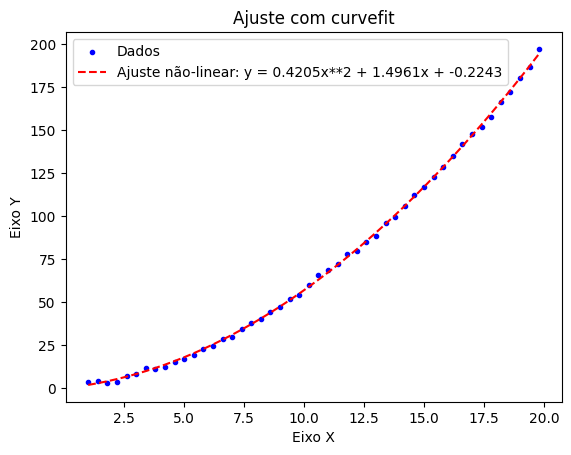

In [48]:
plt.scatter(x, dados, color='b', marker='.', label='Dados')
plt.plot(x, g(x, *popt), 'r--', label= f'Ajuste não-linear: y = {popt[0]:.4f}x**2 + {popt[1]:.4f}x + {popt[2]:.4f}')
plt.legend()
plt.title('Ajuste com curvefit')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

In [49]:
pcov

array([[ 4.00724897e-05, -8.33507271e-04,  3.10374595e-03],
       [-8.33507271e-04,  1.83200459e-02, -7.47821759e-02],
       [ 3.10374595e-03, -7.47821759e-02,  3.76916160e-01]])

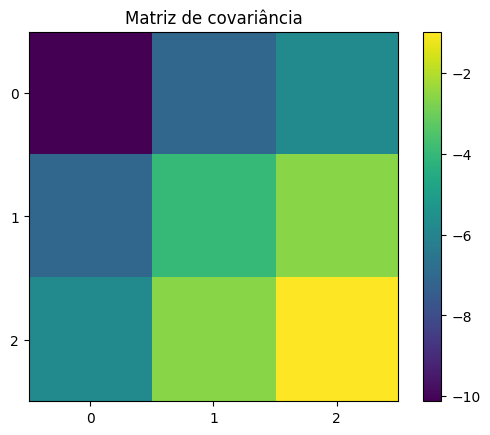

In [54]:
plt.imshow(np.log(np.abs(pcov)))
plt.title('Matriz de covariância')
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])
plt.colorbar()
plt.show()

In [51]:
np.sqrt(np.diag(pcov)) # a raiz quadrada dos elementos da diagonal nos dá uma estimativa do erro em cada parâmetro
                       # aqui, temos erros bem pequenos

array([0.00633028, 0.13535156, 0.61393498])